In [1]:
import os
import sys
from pathlib import Path
import torch
import numpy as np
import matplotlib.pyplot as plt
import yaml

if os.path.abspath('..') not in sys.path:
    sys.path.append(os.path.abspath('..'))
from t_core import volume_tools as vt
from t_core import fields
from t_core import bsplinefield

Create base volume on which to operate

In [2]:
vol = vt.make_volume((300,300,300), speckle_size=7, convolution_kernel=7)

Create field which is a superposition of 2 Gaussian localised fields

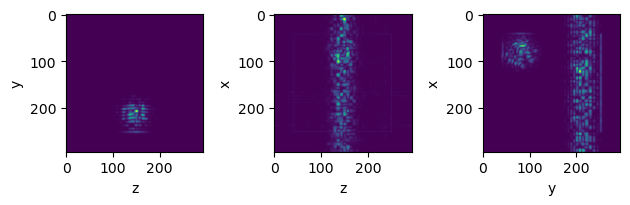

In [3]:

f = fields.AdditiveFieldArray([
    fields.GaussianDisplacementField((0.0,0.1,0.1),(0.0,0.05,0.0),(0.45,0.45,0.0)),
    fields.GaussianDisplacementField((0.1,0.1,0.1),(0.05,0.05,0.05),(-0.45,-0.45,0.0))
])
vol_A = f(vol)
vt.plot_volume(np.abs(vol - vol_A))

For reproducibility, we can save the field to file and load it back

In [4]:
with open('fields.yaml', 'w') as fout:
    yaml.dump(f.to_dict(), fout)

with open('fields.yaml', 'r') as fin:
    d = yaml.load(fin, Loader=yaml.FullLoader)
print(d)

f2 = fields.AdditiveFieldArray.from_dict(d)

{'class': 'AdditiveFieldArray', 'fields': [{'A_xyz': (0.0, 0.05, 0.0), 'class': 'GaussianDisplacementField', 'r0_xyz': (0.45, 0.45, 0.0), 'sigma_xyz': (0.0, 0.1, 0.1)}, {'A_xyz': (0.05, 0.05, 0.05), 'class': 'GaussianDisplacementField', 'r0_xyz': (-0.45, -0.45, 0.0), 'sigma_xyz': (0.1, 0.1, 0.1)}]}


Verify that it's giving the same displacement

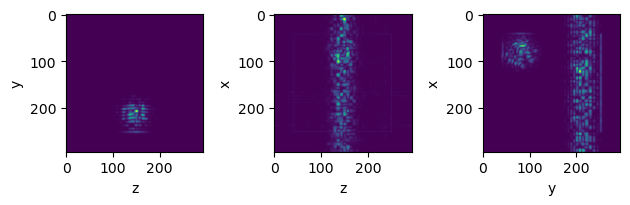

True

In [5]:
vol_B = f2(vol)
vt.plot_volume(np.abs(vol - vol_B))
np.allclose(vol_A, vol_B)

Other fields are also supported

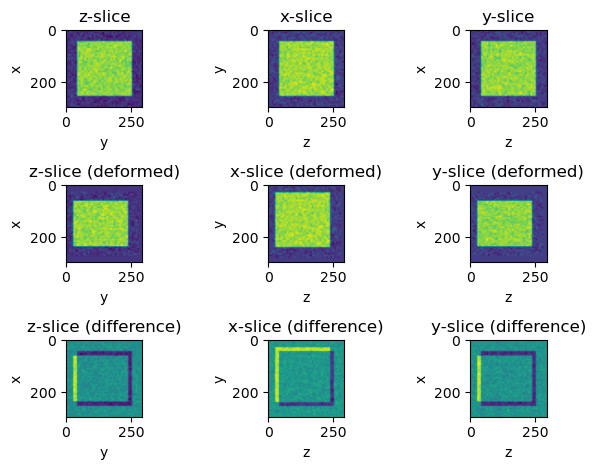

In [6]:
f = fields.AdditiveFieldArray([
    fields.UniformDisplacementField((0.0,0.1,0.1)),
    fields.UniformStrainDisplacementField((0.2,0.0,0.0))
])
vol_A = f(vol)
vt.plot_undef_def_slices(vol, vol_A)

We provide support for cubic B-spline field in 3d

In [7]:
filecontents = """(GridOrigin -0.035 -0.046 -0.041)
(GridSize 6 7 7)
(GridSpacing 0.032 0.032 0.032)
(NumberOfParameters 882)
(Transform "BSplineTransform")
(TransformParameters 0.00006316667226028444 0.00012638382585017043 0.00013180717935004714 0.00012167199840505845 0.00009881944035857396 0.0000346594993332278 0.00015711412901907372 0.0004334540996384322 0.0005635962467230189 0.0006020782779760073 0.0005458369045555354 0.00022372098319495807 0.00016128267694447457 0.0005863148478588104 0.0008542708788545537 0.0009716883137872338 0.0009146518117679119 0.0003886647555072174 0.00015952333768505498 0.0006878673555023099 0.0010541019589730945 0.001213646643419497 0.0011488890271249086 0.0004875867243886882 0.00015761225743714805 0.0005866410984625513 0.0008544126439915137 0.00095041130123534 0.0008630549269438615 0.0003417438354303139 0.00015156414833991658 0.0004344477655698414 0.0005656891348764124 0.0005766885382659726 0.00046756450070148126 0.00014816105023363432 0.00006294531391843034 0.00013304235549108152 0.00014023128134953188 0.00011511183423804297 0.00006361324107114102 -0.000001642082808091278 0.00009086840631014999 0.00007964444166541179 0.0000063425010390461225 -0.00004612531490071676 -0.00006207423539587974 -0.000047796619300627356 0.00017301956442369624 0.00013492751325966648 0.0000138929322354311 -0.000042369788687671636 -0.00004103263236911245 -0.000057596392396625686 0.00011962820644396826 0.000030125334410286907 -0.00013025633966708806 -0.00003950708434570436 -0.0000092675902249597 -0.00005221120536203443 0.00006848268989516408 0.000033586712903034186 -0.000015510633955878033 -0.0001172974152959324 0.000013979831204980157 -0.00005956071353228888 0.00009235954018010082 0.000026076721595733987 -0.00005462036920071965 -0.00008115761586150736 -0.00004418709153880826 -0.0001191859408665101 0.00013414633909445615 0.00011792381680987535 0.00003566160838091724 -0.000037794779718754546 -0.00010256175994816125 -0.00017302474241861397 0.00007989787365471739 0.0000863720335877203 0.000028662668629450903 -0.00004361673658306099 -0.00011238700339394838 -0.00011014703230348679 0.00007368744902282184 0.00004891978493078837 -0.000009066038017912704 -0.0000451228597025932 -0.000045896755893308154 -0.00003671898325054656 0.0001507402844441065 0.000053904349134281765 -0.000005175945855994914 -0.00000660546934224465 -0.00003755715591556774 -0.00007374622728858376 0.00014220773070657596 0.0000012236171492278814 -0.000046072254232229705 0.00008676460181628508 -0.00002404525046392138 -0.00013516453591318856 0.00011246016394856244 -0.00002526956771389321 0.00004833319072008789 -0.00002128203191448906 0.000032906836651666885 -0.00017364526366504303 0.00010345404974448903 -0.000023693046844227816 -0.00001739880086277399 0.00005282012623013163 0.000031135928543663047 -0.00017277222791266467 0.00009547676118994185 0.000028718513773671547 -0.000002683157726354126 0.0000015418841822179848 -0.000028241381321087976 -0.00015081706705661113 0.0000568557661520908 0.00004795719533092666 0.000009270263465730096 -0.00004012663785797504 -0.00008532359259356218 -0.00008952865873619752 0.000059023403341570274 0.00002854164257185894 -0.000013008440903671156 -0.00003429724990915928 -0.000026183175198326014 -0.00002694569281435831 0.00012418832558272873 -0.000001416920763824949 -0.000014675579526141059 0.00000435678115173301 0.00001388893376788846 -0.00007483532751879289 0.00014498359623744982 -0.0000025194299703470955 0.000007939016279843355 -0.000020536637860438298 0.000006370863113995126 -0.00016223045455188414 0.00013781844614107257 -0.0000377181765679243 0.00003270090658376412 -0.00001722656796192309 0.00004402067718408837 -0.00022216214168148472 0.00010658855159367742 -0.000004135344715406893 0.000011199235443416402 -0.00002383305107007564 -0.000002633502917489466 -0.00018784536751669315 0.00006564760052247623 -9.746155253933088e-7 0.000003333920170456443 0.000008582500587282521 0.000010358122590198314 -0.00011837563244297346 0.00003847935213728851 0.000017401678652097967 -0.0000054745828187250325 -0.00003486600475478834 -0.00005945368728871311 -0.00006800639513764835 0.00006703658811056315 0.000042283301303199236 -0.000008776148713167027 -0.00004516410887440653 -0.000055931158591352016 -0.00004788393423989548 0.00011364936348050192 0.000022149081653804138 0.000012087617251297385 0.00002608246372390422 -0.000021008855250288327 -0.0001111488987729301 0.00010326105630524877 -0.0000023944269975561384 -0.000050933998781973314 0.00003710292389996721 0.000006382769762873273 -0.00016266326705579576 0.00009016839302697801 0.000015322372972330405 -0.00003016756511065253 -0.00005675457194985136 0.00003193324242762585 -0.0001928742120384956 0.0000867169405812716 0.000006324135894911446 -0.000064058088052732 0.000028032977851267195 0.00001648261316849808 -0.00018006924018145221 0.0000791865491209547 0.00003883081279892015 0.000024774657550407326 0.0000337581575383963 -0.000032230203850348034 -0.00015071290027919985 0.000050329390244086915 0.000023009512698252213 -0.000020755946383655457 -0.00006552636410845161 -0.0000979919274749797 -0.0000851457272996029 0.00007579144476081171 0.00005384238572564751 -0.000014965319764072983 -0.00007126412224409778 -0.00010134668366188923 -0.00007498841094485445 0.00010084281247560861 0.00005280855870759482 0.000008150240793026667 -0.000043014468234986176 -0.00013049365088140034 -0.0001581731926025359 0.000033823045941417924 0.000011256972035761285 0.00005460228241434701 0.0001285583997226669 -0.000027374656323334733 -0.00015772904391771526 -0.000015223576930448707 0.000010648212804722329 0.00009108340934122919 0.00005448390378458156 -0.00003162040520775638 -0.00016098849608084712 0.000026780187866007992 0.00003012320742444615 0.00005467932193650665 0.0000816235179250412 -0.0000624394517944386 -0.00018508057973494352 0.00008242523911159215 0.000027371147367587544 -0.00001204074984409178 -0.00006387310164942372 -0.00018684672036789536 -0.00020853271617960104 0.00006452083048641794 0.00002831370124960969 -0.00004431369270499588 -0.00011003483089399994 -0.000153768034903637 -0.00011131973629003533 0.00000531063959484429 -0.00006396110873946572 -0.00012780842844078828 -0.00016257019684730602 -0.0001605125970665287 -0.00007991809667896438 -0.00008414609738888053 -0.00037412854280683067 -0.000540735807527341 -0.0006010054462457601 -0.0005418107423695038 -0.00024830839919430834 -0.0002015231947798952 -0.0006454058281863123 -0.0008288786411149265 -0.0008629725520065716 -0.0007460585342751237 -0.0003275323265313891 -0.0002824345663545153 -0.0008303213489531254 -0.0010253543077858574 -0.0010461542098035878 -0.0008850733142865172 -0.0003815139870373374 -0.00020169324029137626 -0.0006523226917389693 -0.0008403732454818304 -0.0008805703810313753 -0.0007679791612680909 -0.0003419987922332041 -0.00008464552564899155 -0.00038677720269253614 -0.0005614772213211302 -0.000629471999987142 -0.0005785684161270183 -0.00027208974542200916 0.0000029659214357160827 -0.00007612014478031187 -0.00014639780317376137 -0.0001860408988202793 -0.00018629964446998648 -0.00009467433789225965 0.000049896421021001006 0.00007733519267806055 0.00004707063795892285 0.000002836638586089535 -0.00004695010502526325 -0.00004516357996267009 0.00010501176878842912 0.00009535679393008823 -0.000026507712837519 -0.00013742343560509715 -0.00021818931098912755 -0.00013822309677194997 0.0000736281281469639 0.00006148420796182209 -0.000027605306811307474 -0.00010600076944443936 -0.0001625415653180979 -0.0001017568729440138 0.000010470230121202736 0.0000049736233589684114 -0.00001562365990387484 -0.00003372540568224732 -0.00004717754366230286 -0.000030376726114808365 -0.0000736985654644605 -0.00006887297600192107 8.121872237213035e-8 0.00005618590708050736 0.00009167578907017151 0.00005386480842114177 -0.00013415118013065553 -0.0001283565541232553 0.000004334832931877885 0.0001138233681480384 0.00018078712221118124 0.0001092408418077368 -0.00007500694326785233 -0.0001065430849647776 -0.00006147669537528668 -0.000009691425788346461 0.00003869231694976285 0.00003838528628322314 0.00004336670271190639 0.00016273418446688615 0.00021834108338127808 0.00021017990621868913 0.00013693489312959699 0.000036513745338266265 0.00005853589765176346 0.00005937290293957482 0.00002735202888843986 0.000024605866215865372 -0.00005991211676592888 -0.00004330639585216861 0.00004456063414292035 0.0000024229917900973944 -0.000013951829980053393 0.00003720035872195353 -0.00003496970406142651 -0.000035632398607833956 0.000009122990033260334 -0.000004550671244901255 -0.00001926960866337892 -0.000012563239359178455 -0.000013301187409436458 -0.000010531971432712366 -0.00006861088250821852 -0.00000190466531226914 0.000013287921985313317 -0.000046727327904375326 0.00003174093631340081 0.000022639278216369787 -0.00014335746524031333 -0.00011581724494412826 -0.000016190613188981425 0.000005566519610523907 0.00008443479644026274 0.0000389645279776578 -0.00010756426741284149 -0.00022770670135371807 -0.0002358100007099887 -0.00020101041270866287 -0.00012790322707151647 -0.000038142870079486834 0.000060265412800962304 0.00021734153578932682 0.0002989847860245159 0.00029567497097254217 0.0002064999951156889 0.00006154947481149907 0.00004007545695047502 0.000018920040510463475 0.000004924963617097447 0.000004856787880866713 -0.0000037944440883788388 -0.0000028130592797441095 0.000037806914912325646 -0.000007214477882769695 -0.0000072036211603135365 -0.000021238249723600254 0.000015517655282947015 -3.0502438865254084e-7 0.000021171947114904246 -0.000006517253949475339 -0.000011804949442361264 -0.000006660617620336868 -0.0000011773631598073804 0.000004967815610253994 -0.00003204462260172468 0.000039263221839920206 0.000004889950617245679 0.00000885626438811334 -0.000022148614350002072 -8.736229231595278e-7 -0.00009494596900730721 -0.00004181378130794143 0.0000013364102689383067 0.000005053539484275146 0.000006129297407418928 -0.000014177616180886097 -0.00011189631640299384 -0.00027335088187535454 -0.000323041893770893 -0.00030572974327132136 -0.0002230743292327749 -0.00007998691793824656 0.0000719531111900759 0.00025323983361425444 0.0003537228942479658 0.00035089965461530787 0.00024540869082261674 0.00006940800353121494 0.000010092902533338744 -0.000010760247079693362 -0.000008726384353943576 -0.0000015773850384191639 0.000001159836752975207 0.00001984783689914384 0.000020567912413251667 -0.000006197681174640503 0.000009012905410004982 0.000008463181093586826 -0.000001160709169676163 0.00001866111278498768 0.00002261959509374461 -0.000009289362915886482 0.0000020183557772182796 -0.000003983614155364911 -0.00000404326045398081 0.000012848166642446685 -2.568664270066881e-7 -7.554950688112557e-7 -0.000007243301985685503 -0.000010025653479037687 0.000007620657007813254 -0.000019277698692946065 -0.00003643605364836233 -0.00001235583611994689 0.000010516010833850487 0.0000071256219280435976 -0.00001246427418022264 -0.00005766695756830269 -0.00010505597914237454 -0.000291267509029968 -0.0003769355721870443 -0.0003757786504088982 -0.00028745371264773706 -0.00010651287821189551 0.00005301259555953717 0.0002115066929792434 0.00031086293059899805 0.00030643608097319597 0.0001995784383229515 0.000039903592560331024 -0.000048658082764936574 -0.000020294845574389295 -0.000004029706250914171 0.00001863837354509887 0.000009189875561803213 0.0000026342699363519953 -0.000031532739072067275 0.0000353409588829748 -0.00002183171789254616 -0.000009702319048615418 -0.000005949042075501627 0.000003347447827486802 -0.000005943130190905984 0.000007986004215671343 -0.0000013987762299957407 -0.000011632762863929468 -0.0000029284968277951916 0.0000028744888914446963 0.00001622279567864541 -0.000007798589716054862 0.000009767175704200094 -0.000002285878022665379 0.000014307289632044558 -0.000020291697610415922 0.000014826865024417083 0.000009638761226221575 0.000007951504930206666 0.00002242259106962658 -0.000016615238495086306 -0.00005379312803899835 -0.00007536619335401441 -0.00022952440347002613 -0.0003144708605787805 -0.00031723719177273734 -0.00023954444865455915 -0.00008170173549662184 0.000023964976416545734 0.000144394777871346 0.00023643763145448135 0.00023359361762369062 0.0001376378278089285 0.00000979529181083316 -0.00010636048511260222 -0.0000859673894302744 0.000029574940892659247 0.000058420872805607065 0.0000313705673507741 -0.00001296108865895929 -0.00008833212032981055 -0.000035497804438514136 0.000044350019123934275 0.000015732528492156353 0.00001224936397549754 -0.000008722906130020048 -0.000041246051306133554 -8.183191385200358e-7 0.000018035370965467982 0.0000011199860160786 0.0000023241301948404824 -0.000006674731733682481 0.00001652101536394381 0.000027842205880881183 -0.000038147843556717804 -0.00000324770213499685 -0.000012108117929728896 -0.000021768434696955304 0.000047728453263457455 0.00006141264382107845 -0.000019656859164986076 -0.000018551307378114277 -0.0000465262387645695 -0.000041106866558028726 -0.00004267776780731853 -0.00015065260816018108 -0.00022304353672897515 -0.0002275622011732401 -0.0001655578913257392 -0.00004762657767761176 -0.000044678196654925805 -0.000019004434000954918 0.0000492622131649251 0.000084978921620512 0.00008120184186932154 0.00003290034773089407 -0.00015664818010477193 -0.000187868866254234 -0.000059485310712117836 0.0000424490312232451 0.00009739882148644407 0.00006658532600380921 -0.00012435470224749057 -0.0001564434519044051 -0.0000628898824759892 0.000013444401814713549 0.00006072646062800468 0.00004608479866146379 -0.00005589840454135601 -0.00007737379635321631 -0.00004648177010844792 -0.00001986969894592 0.0000020147038725556913 0.000007790243884453855 0.00002782382367648669 0.000024704843811754058 -0.000013845080262977754 -0.00004384943599650284 -0.000060465664467514944 -0.000038697404253397595 0.0000841902691781635 0.00009289671067482198 0.000007931088655514195 -0.00006215291377660612 -0.00010502714005776134 -0.00007092226505671393 0.00002309934574120178 -0.000007714011615742565 -0.00006283458564439047 -0.00009237278179824688 -0.00009064304288252725 -0.000040902472881146935 0.0005378376121451075 0.0006673164265158957 0.0002710322060242809 -0.00015118052061958835 -0.0005105548172864069 -0.00043197294035005794 0.0014965590744680111 0.0018826444441109073 0.0007845756831578913 -0.0003884880802457313 -0.0013513444768179029 -0.0011411694747131954 0.001785844047392228 0.002295018359627101 0.0009818852536708673 -0.00039025063118809444 -0.001487909756695831 -0.0012730637768974737 0.0019467547163652217 0.0024992236390003124 0.0010919021107759512 -0.00036499205222826904 -0.0015205361788767067 -0.0013288741077084776 0.001768891899669365 0.002261142615255211 0.0009701539749716342 -0.00036585025828376734 -0.0014407008313345397 -0.0012368274304268574 0.0014734574679196697 0.0018588424603506535 0.0007859279261308469 -0.0003495786518738562 -0.0012777032721672601 -0.0010825049266560238 0.0005205987004607051 0.0006483565397546929 0.0002679905257364165 -0.0001325967585818068 -0.000469600157886394 -0.00039847383984988684 0.0014011277133012129 0.0016818494366798657 0.000583365717756792 -0.0005814954295534821 -0.0015471110936833325 -0.0012451763592282491 0.0039491818545045005 0.005036020680289552 0.0018220738168515484 -0.001990726164190959 -0.004792751434817378 -0.00347161274502121 0.004785165257203939 0.0061020515255585375 0.0019247017901793467 -0.0021942395649474336 -0.005927607890521288 -0.004115780404395967 0.005174346412879124 0.006079526092391239 0.0018938838103543447 -0.0022482526571973283 -0.0058399535709599765 -0.004395574466837481 0.004732421134688671 0.006001450847850058 0.0018119469626068495 -0.0021552090108455085 -0.005853517343885475 -0.004026621454087047 0.003913130243104471 0.005038605960110645 0.0018033274267520117 -0.0018953649762836124 -0.004615783917694073 -0.003325806995326122 0.0013666310994194775 0.0016353072800488872 0.0005588001930647365 -0.0005549233147628679 -0.0014562014252302738 -0.0011609841695741487 0.0016075295537267909 0.0019449727088219667 0.000676694887317161 -0.0006951338168371817 -0.0018595561998189399 -0.0014962203402808386 0.004548376542255024 0.0059968549779266115 0.0021791200954596568 -0.0022084933732219704 -0.005948031153944226 -0.0042251180998408725 0.005479347421350726 0.006746386946086746 0.0018449066791843616 -0.0016021529044766383 -0.006983997524302587 -0.005052111218331739 0.00587183830969425 0.006329698987249224 0.0017389825526115627 -0.0015068705920198175 -0.006414684577888255 -0.0053567944002918 0.005448433174029527 0.006760817128137286 0.0018571321989250878 -0.0016331744448355582 -0.006994880501257575 -0.004951282091606856 0.004540680264640255 0.006025676154294045 0.0021306126255427444 -0.0021806240307997295 -0.005748791628111003 -0.0040631100886027345 0.0015835835498430526 0.0018991813688236075 0.0006366405729609741 -0.0006886661403183097 -0.001776544638874762 -0.0014096391758852684 0.0016983761168862482 0.0020622725560646635 0.0007191098129122883 -0.0007550560642844221 -0.002050125672381881 -0.0016589581779946321 0.004753750630905357 0.006050417970769621 0.00201335338804429 -0.002020869195576506 -0.00608305213997433 -0.004679660529167895 0.005633129325718808 0.006572934516196245 0.0015352058426647162 -0.001500058987391824 -0.006564712121990602 -0.005547902691094816 0.006047544449789167 0.006401871345187739 0.001576562880631379 -0.001598393091704259 -0.0064197263552647115 -0.005925177667268659 0.00565422394696813 0.0065330477675691586 0.0015946711619802228 -0.0014949684515412481 -0.0065848407003515986 -0.005454323426300002 0.004798022954932122 0.006092564653762746 0.001976354756316749 -0.0020559965154156212 -0.00593036256348853 -0.004522343228381581 0.0016938879814786176 0.0020264542442982843 0.0006677669372281964 -0.0007730031242048071 -0.0019888050022190047 -0.0015815464117069087 0.0015208027118949986 0.0018507489319553186 0.0006432638774260573 -0.0007151990367413974 -0.001922250026938253 -0.0015551161540600645 0.004246429237735571 0.005824852233518458 0.0021882186260431167 -0.0021600921021304328 -0.005977191324324755 -0.00443225575470364 0.0050760734440857885 0.0069440037680959755 0.0015782975893855772 -0.0018930852723420555 -0.006806533216731769 -0.005366421186659341 0.00545648637759908 0.006406712361115398 0.001375630701588986 -0.0017914180653045783 -0.006319517896371596 -0.005749484279663711 0.005185196371215737 0.0069604074875318 0.0016633752310338304 -0.001787637683777974 -0.006830493886001766 -0.005283446088232537 0.004386229529691724 0.006149150892160882 0.002190288500639629 -0.0021932120337280706 -0.005947442972464972 -0.004333632451137516 0.0015418517633539446 0.001856437679378928 0.0006110269961467471 -0.0007419715841991049 -0.001893209375194603 -0.001502891435923838 0.001259003465242923 0.0015246210896643088 0.0005172877232074703 -0.0006284388901657376 -0.001658034163039531 -0.0013429698979077675 0.0034636101324331753 0.004658993881554731 0.001837480077906803 -0.0018992571698164286 -0.004974938053658151 -0.0038181081130772778 0.004088381073805761 0.005875594643295334 0.0021403232147544663 -0.0019014163912989355 -0.005941941245200663 -0.004654349912988351 0.0044003627175644745 0.00575530063792167 0.0022965743982051984 -0.0018366797799321461 -0.0060124809242763835 -0.005079295219815422 0.004173585749563137 0.005821132468146705 0.0022728251135834157 -0.0018191117091971222 -0.0060166057632037515 -0.004613468406517631 0.003597578322190904 0.0048874600313279755 0.001881523650257288 -0.0018868982900137074 -0.0049465589997737735 -0.0037700752641143974 0.0012958229272447927 0.0015505789788130022 0.0005011742651842276 -0.0006512404536902491 -0.0016459800800944112 -0.0013133659388291114 0.00043507562029815533 0.0005019741671819279 0.00012972866408744152 -0.0002827532742358718 -0.0006495145308163098 -0.0005090150708861827 0.0011285021088396471 0.0012945789494466624 0.0002993720167418509 -0.0008452898323322488 -0.0018667082409254557 -0.0014383843104292633 0.0012414926934892086 0.0014062872532451612 0.00027849711439094436 -0.001063525830420234 -0.0022956740237453097 -0.0017396009368467165 0.0013034633366272544 0.0014424615625919883 0.00025529896026150675 -0.0011922803417708128 -0.002537392918479238 -0.0019162904571577934 0.0012789633989351977 0.0014429652676708686 0.00029959907940163577 -0.0010563008510236112 -0.0022931933596153477 -0.0017351171587168116 0.0011887947291523847 0.0013610566857547922 0.0003212842165798868 -0.0008464202825317919 -0.0018639056540668097 -0.0014315354243631582 0.00045831683976788686 0.0005216674259599977 0.00012895528341024264 -0.0002905419048595101 -0.0006491308934153373 -0.0005023569145915452)
"""
Path('./TransformParameters.0.txt').write_text(filecontents);

In [8]:
f = bsplinefield.BSplineField.from_transform_file('./TransformParameters.0.txt', units_multiplier=10)
print(f)

BSplineField(phi_x=torch.Size([3, 6, 7, 7]), origin=(-0.35000000000000003, -0.45999999999999996, -0.41000000000000003), spacing=(0.32, 0.32, 0.32))
full support on [-0.03 -0.14 -0.09] to [0.93 1.14 1.19]



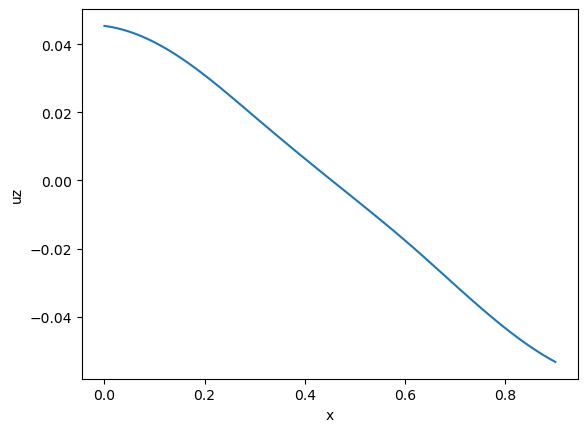

In [9]:
x = torch.linspace(0, 0.9, 100)
y = 0.5*x
z = 0.5*x
uz = f.displacement(x, y, z, i=2)
plt.plot(x, uz)
plt.xlabel('x')
plt.ylabel('uz')
plt.show()